<a href="https://colab.research.google.com/github/undisputedcoder/Hot-Dog-or-Pizza/blob/master/hot_dog_or_pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Network for Classifying 🌭 and 🍕 

## Inspect the data

In [1]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_hotdog/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['hot dog' 'pizza']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (341, 512, 3)


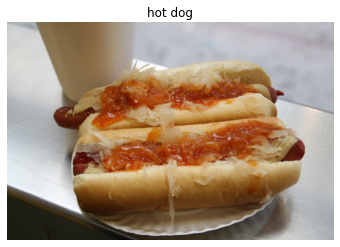

In [3]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_hotdog/train/",
                        target_class="hot dog")

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.9.1
Num GPUs Available:  1


## Preprocess the dataset

In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

SIZE = 224
BATCH = 32

train_dir = "pizza_hotdog/train"
val_dir = "pizza_hotdog/val"

train_ds = image_dataset_from_directory(
    train_dir,
    shuffle=True,
    label_mode='binary',
    image_size=(SIZE,SIZE),
    batch_size=BATCH,
    seed=123
)

val_ds = image_dataset_from_directory(
    val_dir,
    shuffle=True,
    label_mode='binary',
    image_size=(SIZE, SIZE),
    batch_size=BATCH,  
    seed=123
)

Found 1600 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


## Training

In [7]:
from tensorflow.keras import layers

cnn1 = tf.keras.models.Sequential([
    layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(SIZE, SIZE, 3)),
    layers.Conv2D(8, 3, activation='relu' ),
    layers.MaxPooling2D(),
    layers.Conv2D(8, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1, activation="sigmoid")
])

cnn1.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history1 = cnn1.fit(
    train_ds, 
    epochs=5,
    steps_per_epoch=len(train_ds),
    validation_data=val_ds,
    validation_steps=len(val_ds)
)

Epoch 1/5
50/50 [==============================] - 4s 26ms/step - loss: 0.5840 - accuracy: 0.6988 - val_loss: 0.5834 - val_accuracy: 0.7250
Epoch 2/5
50/50 [==============================] - 1s 23ms/step - loss: 0.5233 - accuracy: 0.7387 - val_loss: 0.5476 - val_accuracy: 0.7000
Epoch 3/5
50/50 [==============================] - 1s 23ms/step - loss: 0.4503 - accuracy: 0.7981 - val_loss: 0.5190 - val_accuracy: 0.7300
Epoch 4/5
50/50 [==============================] - 1s 23ms/step - loss: 0.4004 - accuracy: 0.8300 - val_loss: 0.5181 - val_accuracy: 0.7450
Epoch 5/5
50/50 [==============================] - 1s 23ms/step - loss: 0.3807 - accuracy: 0.8388 - val_loss: 0.5193 - val_accuracy: 0.7300


## Evaluate model

<AxesSubplot:>

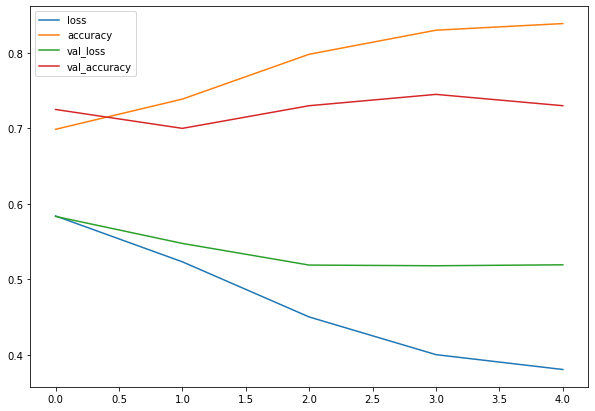

In [8]:
import pandas as pd
pd.DataFrame(history1.history).plot(figsize=(10,7))

In [16]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

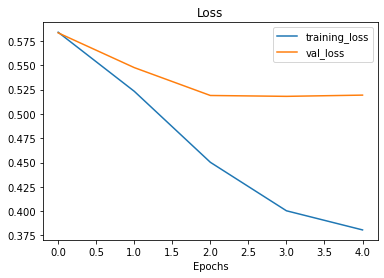

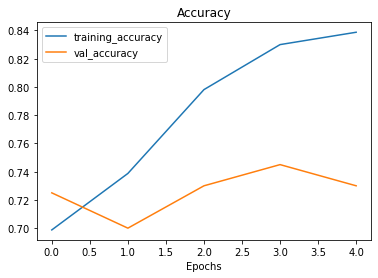

In [11]:
plot_loss_curves(history1)

In [20]:
cnn1 = tf.keras.models.Sequential([
    layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(SIZE, SIZE, 3)),
    layers.Conv2D(10, 3, activation='relu' ),
    layers.MaxPooling2D(),
    layers.Conv2D(10, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(10, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1, activation="sigmoid")
])

cnn1.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history1 = cnn1.fit(
    train_ds, 
    epochs=5,
    steps_per_epoch=len(train_ds),
    validation_data=val_ds,
    validation_steps=len(val_ds)
)

Epoch 1/5
50/50 [==============================] - 2s 28ms/step - loss: 0.6544 - accuracy: 0.6100 - val_loss: 0.6132 - val_accuracy: 0.6350
Epoch 2/5
50/50 [==============================] - 1s 25ms/step - loss: 0.5625 - accuracy: 0.7144 - val_loss: 0.5861 - val_accuracy: 0.6750
Epoch 3/5
50/50 [==============================] - 1s 25ms/step - loss: 0.5158 - accuracy: 0.7494 - val_loss: 0.5992 - val_accuracy: 0.7000
Epoch 4/5
50/50 [==============================] - 1s 25ms/step - loss: 0.4841 - accuracy: 0.7713 - val_loss: 0.5567 - val_accuracy: 0.6950
Epoch 5/5
50/50 [==============================] - 1s 25ms/step - loss: 0.4391 - accuracy: 0.8037 - val_loss: 0.5357 - val_accuracy: 0.7350


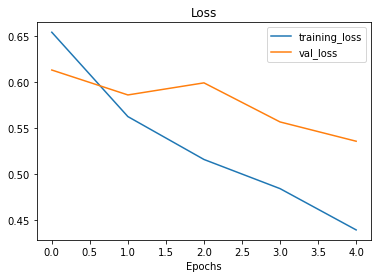

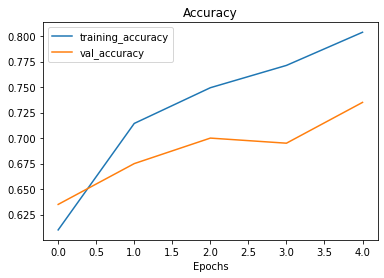

In [21]:
plot_loss_curves(history1)

In [32]:
cnn1 = tf.keras.models.Sequential([
    layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(SIZE, SIZE, 3)),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomZoom(0.5),
    layers.Conv2D(16, 3, activation='relu' ),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1, activation="sigmoid")
])

cnn1.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history1 = cnn1.fit(
    train_ds, 
    epochs=8,
    steps_per_epoch=len(train_ds),
    validation_data=val_ds,
    validation_steps=len(val_ds)
)

Epoch 1/8
50/50 [==============================] - 5s 80ms/step - loss: 0.6677 - accuracy: 0.5669 - val_loss: 0.6137 - val_accuracy: 0.6350
Epoch 2/8
50/50 [==============================] - 4s 75ms/step - loss: 0.5916 - accuracy: 0.7000 - val_loss: 0.5489 - val_accuracy: 0.7100
Epoch 3/8
50/50 [==============================] - 4s 77ms/step - loss: 0.5913 - accuracy: 0.6963 - val_loss: 0.5794 - val_accuracy: 0.6800
Epoch 4/8
50/50 [==============================] - 4s 76ms/step - loss: 0.5742 - accuracy: 0.7025 - val_loss: 0.5252 - val_accuracy: 0.7400
Epoch 5/8
50/50 [==============================] - 4s 78ms/step - loss: 0.5322 - accuracy: 0.7437 - val_loss: 0.4793 - val_accuracy: 0.7450
Epoch 6/8
50/50 [==============================] - 4s 82ms/step - loss: 0.5234 - accuracy: 0.7400 - val_loss: 0.4926 - val_accuracy: 0.7500
Epoch 7/8
50/50 [==============================] - 4s 75ms/step - loss: 0.5259 - accuracy: 0.7575 - val_loss: 0.4523 - val_accuracy: 0.8000
Epoch 8/8
50/50 [===

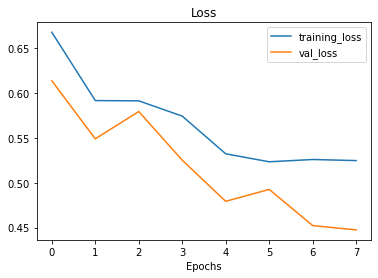

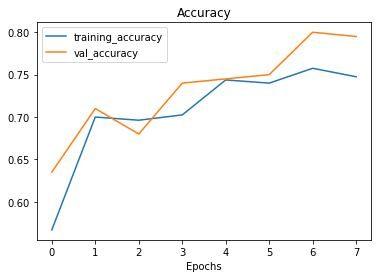

In [33]:
plot_loss_curves(history1)

## Prediction

In [52]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def pred_and_plot(filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_img(filename, target_size=(SIZE, SIZE))

  img = img_to_array(img)

  # Make a prediction
  pred = cnn1.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]
    
  score = tf.nn.softmax(pred[0])  

  # Plot the image and predicted class
  plt.imshow(img.astype(np.uint8))
  plt.title(f"Prediction: {pred_class}, {np.max(score)}")
  plt.axis(False);

1/1 [==============================] - 0s 15ms/step


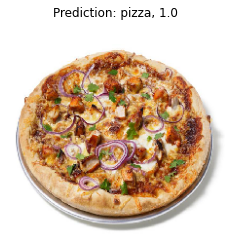

In [53]:
pred_and_plot("test.jpeg", class_names)

1/1 [==============================] - 0s 15ms/step


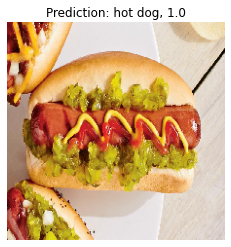

In [54]:
pred_and_plot("test0.jpg", class_names)

# Multi-class classification

In [6]:
import splitfolders

splitfolders.ratio("10_food_classes", output="food_10",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

Copying files: 10000 files [00:14, 709.93 files/s]


In [7]:
import pathlib
import numpy as np

data_dir = pathlib.Path("food_10/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['apple_pie' 'chicken_wings' 'chocolate_cake' 'donuts' 'fish_and_chips'
 'french_fries' 'hamburger' 'hot_dog' 'ice_cream' 'pizza']


Image shape: (384, 512, 3)


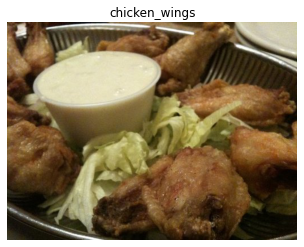

In [10]:
img = view_random_image(target_dir="food_10/train/",
                        target_class="chicken_wings")

In [11]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

SIZE = 224
BATCH = 32

train_dir = "food_10/train"
val_dir = "food_10/val"

train_ds = image_dataset_from_directory(
    train_dir,
    shuffle=True,
    label_mode='int', # sparse_categorical_crossentropy
    image_size=(SIZE,SIZE),
    batch_size=BATCH,
    seed=123
)

val_ds = image_dataset_from_directory(
    val_dir,
    shuffle=True,
    label_mode='int',
    image_size=(SIZE, SIZE),
    batch_size=BATCH,  
    seed=123
)

Found 8000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


In [23]:
from tensorflow.keras import layers

cnn1 = tf.keras.models.Sequential([
    layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(SIZE, SIZE, 3)),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomZoom(0.5),
    layers.Conv2D(16, 3, activation='relu' ),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
])

cnn1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history1 = cnn1.fit(
    train_ds, 
    epochs=6,
    steps_per_epoch=len(train_ds),
    validation_data=val_ds,
    validation_steps=len(val_ds)
)

Epoch 1/6
250/250 [==============================] - 19s 72ms/step - loss: 2.1737 - accuracy: 0.2115 - val_loss: 2.0156 - val_accuracy: 0.2620
Epoch 2/6
250/250 [==============================] - 18s 73ms/step - loss: 2.0487 - accuracy: 0.2601 - val_loss: 1.9837 - val_accuracy: 0.2770
Epoch 3/6
250/250 [==============================] - 18s 73ms/step - loss: 1.9899 - accuracy: 0.2919 - val_loss: 1.9240 - val_accuracy: 0.2940
Epoch 4/6
250/250 [==============================] - 18s 73ms/step - loss: 1.9478 - accuracy: 0.3066 - val_loss: 1.9683 - val_accuracy: 0.2930
Epoch 5/6
250/250 [==============================] - 18s 72ms/step - loss: 1.9240 - accuracy: 0.3191 - val_loss: 2.0408 - val_accuracy: 0.2890
Epoch 6/6
250/250 [==============================] - 19s 74ms/step - loss: 1.8977 - accuracy: 0.3315 - val_loss: 1.8519 - val_accuracy: 0.3340


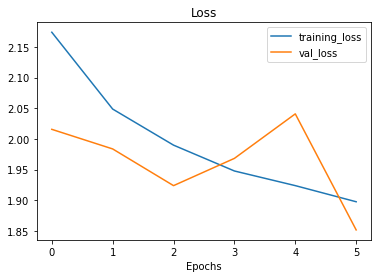

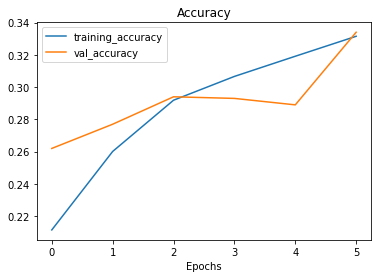

In [24]:
plot_loss_curves(history1)

## Prediction

In [34]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def pred_and_plot(filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_img(filename, target_size=(SIZE, SIZE))

  img = img_to_array(img)

  # Make a prediction
  pred = cnn1.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[pred.argmax()]
    
  score = tf.nn.softmax(pred[0])  

  # Plot the image and predicted class
  plt.imshow(img.astype(np.uint8))
  plt.title(f"Prediction: {pred_class}, {tf.round(np.max(score)*100)}")
  plt.axis(False);

1/1 [==============================] - 0s 14ms/step


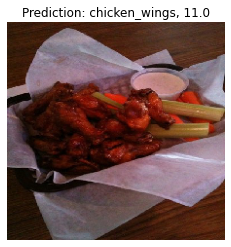

In [35]:
pred_and_plot("food_10/test/chicken_wings/25735.jpg", class_names)

1/1 [==============================] - 0s 15ms/step


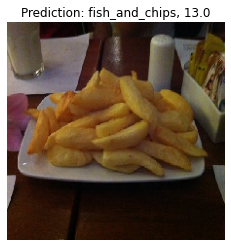

In [36]:
pred_and_plot("food_10/test/french_fries/234706.jpg", class_names)

1/1 [==============================] - 0s 15ms/step


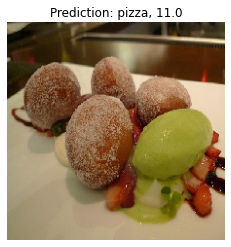

In [37]:
pred_and_plot("food_10/test/donuts/225862.jpg", class_names)

In [ ]:
# keep a log of builds
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)